#   What are the factors that influence the price of Boston Airbnb?

In [1]:
# libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# import dataset
data = pd.read_csv('data/Boston/data_clean.csv')
print(data.shape)
data.head()

(3405, 116)


,ppa,bathrooms,bedrooms,beds,host_since,host_response_rate,host_acceptance_rate,number_of_reviews,reviews_per_month,review_scores_accuracy,...,cancellation_policy_strict,cancellation_policy_super_strict_30,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t
0,62.50,1.5,2.0,3.0,511,100.0,94.0,0,1.17,10.0,...,0,0,0,0,0,1,1,0,1,0
1,32.50,1.0,1.0,1.0,1553,100.0,100.0,36,1.30,10.0,...,0,0,0,0,0,1,1,0,0,1
2,32.50,1.0,1.0,1.0,2676,100.0,88.0,41,0.47,10.0,...,0,0,0,0,1,0,0,1,0,1
3,18.75,1.0,1.0,2.0,1235,100.0,50.0,1,1.00,10.0,...,0,0,0,0,1,0,1,0,1,0
4,39.50,1.5,1.0,2.0,850,100.0,100.0,29,2.25,10.0,...,0,0,0,0,0,1,0,1,0,1


In [3]:
# keep only the columns with true values
data = data.drop(['host_is_superhost_f', 'host_identity_verified_f'], axis=1)

RMSE test set: 62.534
RMSE train set: 23.038


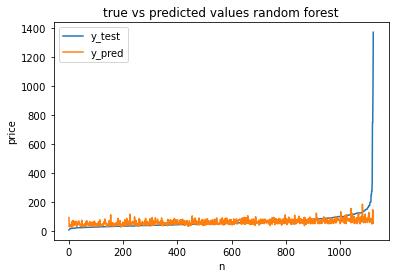

In [4]:
# prepare y and X
y = data['ppa']
X = data.drop('ppa', axis=1)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=333)

# create the model, fit and predict
rf = RandomForestRegressor(n_estimators = 500, max_depth = 10, random_state=333)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# evaluate test set
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print('RMSE test set:', round(rmse_test,3))

# check the error on the train set
y_pred_train = rf.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('RMSE train set:', round(rmse_train,3))

# prepare data for plot
d = {'y_test': y_test.values, 'y_pred': y_pred}
df = pd.DataFrame(d)
df = df.sort_values('y_test')
df = df.reset_index(drop=True)

# plot true (test) vs predicted values
df.plot()
plt.ylabel('price')
plt.xlabel('n')
plt.title('true vs predicted values random forest')
plt.savefig('figures/6_true_pred.png', bbox_inches='tight')
plt.show()

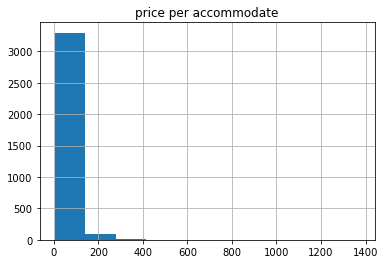

In [5]:
data['ppa'].hist()
plt.title('price per accommodate')
plt.savefig('figures/6_ppa_hist.png', bbox_inches='tight')
plt.show()

(3374, 114)


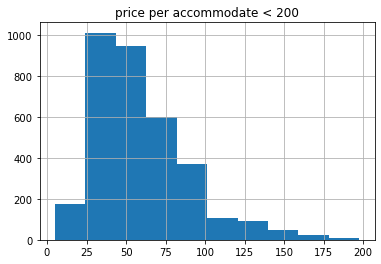

In [6]:
data = data[data['ppa'] < 200]
print(data.shape)
data['ppa'].hist()
plt.title('price per accommodate < 200')
plt.savefig('figures/6_ppa_hist_under200.png', bbox_inches='tight')
plt.show()

RMSE test set: 24.468
RMSE train set: 16.623


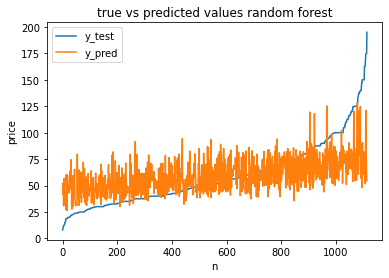

In [7]:
# prepare y and X
y = data['ppa']
X = data.drop('ppa', axis=1)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=333)

# create the model, fit and predict
rf = RandomForestRegressor(n_estimators = 500, max_depth = 10, random_state=333)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# evaluate test set
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
print('RMSE test set:', round(rmse_test,3))

# check the error on the train set
y_pred_train = rf.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
print('RMSE train set:', round(rmse_train,3))

# prepare data for plot
d = {'y_test': y_test.values, 'y_pred': y_pred}
df = pd.DataFrame(d)
df = df.sort_values('y_test')
df = df.reset_index(drop=True)

# plot true (test) vs predicted values
df.plot()
plt.ylabel('price')
plt.xlabel('n')
plt.title('true vs predicted values random forest')
plt.savefig('figures/6_true_pred_under200.png', bbox_inches='tight')
plt.show()

In [8]:
feature_importances = pd.DataFrame(rf.feature_importances_, index =X.columns,  
                                   columns=['importance']).sort_values('importance', ascending=False)

In [9]:
feature_importances.head()

,importance
host_since,0.086353
review_scores_location,0.083549
beds,0.066840
reviews_per_month,0.058539
Free Parking on Premises,0.045071


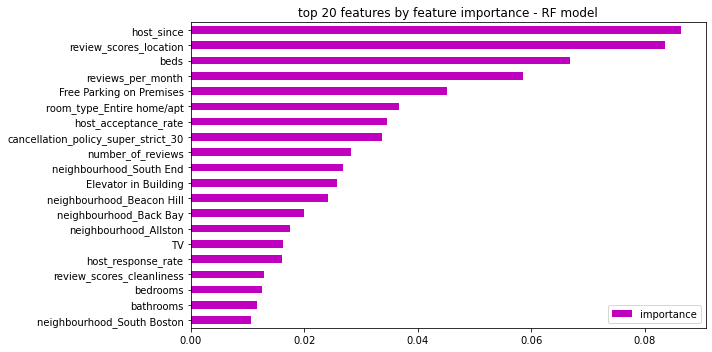

In [11]:
feature_importances.sort_values(by='importance', ascending=True).tail(20).plot.barh(color='m', figsize=(10,5))
plt.title('top 20 features by feature importance - RF model')
plt.tight_layout()
plt.savefig('figures/6_top20_features.png', bbox_inches='tight')
plt.show()